In [12]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [13]:
workspace = Path()
model_id = "20240519_1730_baseline-b16-e300-w211-aug-xyz-d02-lr1e-4_fold0"
tasks = ["segmentation", "noduletype", "malignancy"]

{'train': [{'loss_segmentation': 0.9640096985932552, 'loss_noduletype': 1.3842031775098858, 'loss_malignancy': 0.6894611933014609, 'loss_total': 4.001683755354448, 'malignancy_auc': 0.5557405048633627, 'noduletype_balanced_accuracy': 0.24932266371841968, 'segmentation_dice': 0.03599030140674475}, {'loss_segmentation': 0.9515663078337004, 'loss_noduletype': 1.3689921913724956, 'loss_malignancy': 0.6580218094767947, 'loss_total': 3.9301466436097114, 'malignancy_auc': 0.6547784334143238, 'noduletype_balanced_accuracy': 0.2509877085162423, 'segmentation_dice': 0.04843369216629956}, {'loss_segmentation': 0.9546508247202093, 'loss_noduletype': 1.3615049629500418, 'loss_malignancy': 0.597112858837301, 'loss_total': 3.867919445037842, 'malignancy_auc': 0.7239212897107634, 'noduletype_balanced_accuracy': 0.27446652899673035, 'segmentation_dice': 0.045349175279790654}, {'loss_segmentation': 0.9437640706698099, 'loss_noduletype': 1.3469146598469128, 'loss_malignancy': 0.5717994886817355, 'loss_to

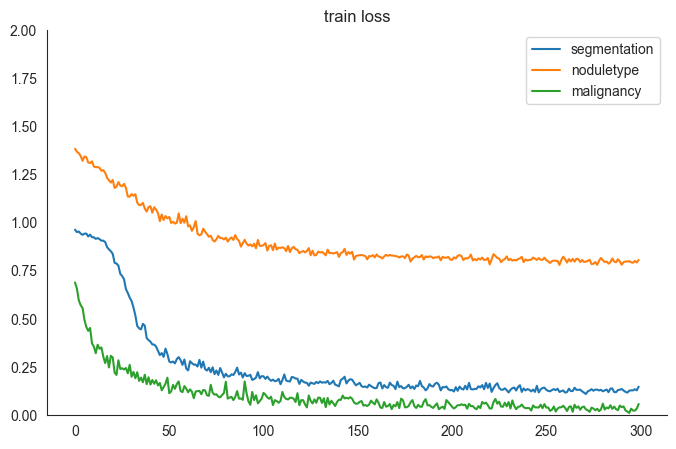

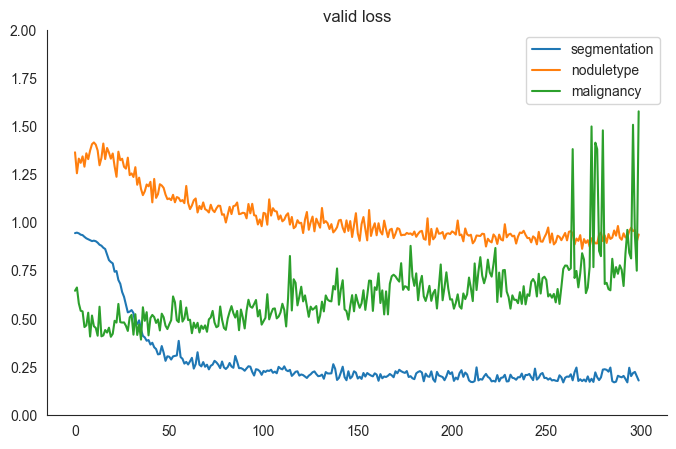

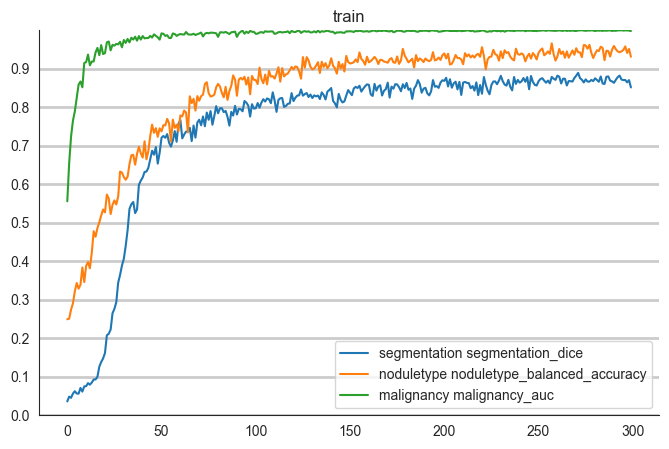

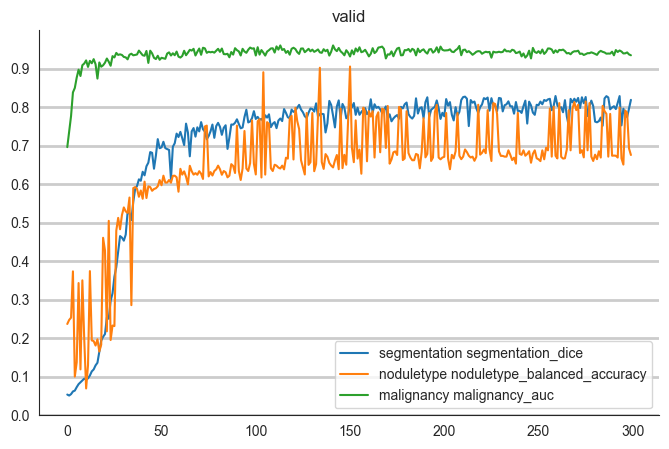

In [14]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

print(metrics)
figsize=(8,5)
for mode in ["train", "valid"]:
    plt.figure(figsize=figsize)
    for task in tasks:
        plt.plot(
            [metrics[mode][i][f"loss_{task}"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 2])
    sns.despine()

task_specific_metrics = {
    "segmentation": "segmentation_dice",
    "malignancy": "malignancy_auc",
    "noduletype": "noduletype_balanced_accuracy"
}

for mode in ["train", "valid"]:
    plt.figure(figsize=figsize)
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    plt.yticks(np.arange(0,1, 0.5), minor=True)
    plt.yticks(np.arange(0,1, 0.1), minor=False)
    plt.grid(which="major", axis="y", linewidth=2)
    plt.grid(which="minor", axis="y", linewidth=1)
    sns.despine()